# <font color= 'blue'> Project: High Value Customer Identification (Insiders)</font>


**Business Challange**

A loyalty program of customers to increase sales frquency.

**Business Planning (IOT)**

**<font color= 'green'>Input**</font>

**1. Business Problem**
- Select the most valuable customers to join a loyalty program.

**2. Dataset**
    
<u>One year e-commerce sales.</u>
    
   - Invoice No: Invoice number (A 6-digit integral number uniquely assigned to each transaction)

   - Stock Code: Product (item) code

   - Description: Product (item) name

   - Quantity: The quantities of each product (item) per transaction

   - Invoice Date: The day when each transaction was generated

   - Unit Price: Unit price (Product price per unit)

   - Customer ID: Customer number (Unique ID assigned to each customer)
    
   - Country: Country name (The name of the country where each customer resides)
    
**<font color= 'green'>Output**</font>
- **1.** <u>Indicate customers who will be part of a loyalty program called Insiders.</u>
     - List: client_id | is_insider
             10323 |   yes
             32413 |   no
- **2.**<u> A report with the answers for the business questions.</u>
    - Who are the customers eligible to join the program?
    - How many customers will be part os this group?
    - What are the main characteristics of these customers?
    - What is the contribution percentage revenue from Insiders?
    - What is the group's revenue expectation for the coming months?
    - What are the condictions for select customers to join Insiders?
    - What are the condictions for removing Insiders customers?
    - What is the guarantee that the Insiders program is better than the rest of the base?
    - What actions can the marketing team take to increase revenue?
    
**<font color= 'green'>Taks**</font>
- <u>**1.** Who are the customers eligible to join the program?</u>
  - What does it mean, to be elegible? What does high-value customers mean?
  - Revenue: ticket, bascket size, high LTV (Lifetime Value), churn probability,high TVC prevision, purchasing propensity.
  - Cost: lower return rate.
  - Purchase experience: high average evaluation rate.
     
- <u>**2.** How many customers will be part os this group?</u>
  - Total nambers of customers.
  - % Insiders group.
        
- <u>**3.** What are the main characteristics of these customers?</u>
  - Age
  - Location
  - Others characteristics.
  - Ticket, bascket size, high LTV, churn probability,high TVC prevision, purchasing propensity.
       
        
- <u>**4.** What is the contribution percentage revenue from Insiders?</u>
   - Total revenue for the year.
   - Insiders group revenue.
         
- <u>**5.** What is the group's revenue expectation for the coming months?</u>
  - LTV Insisders group.
  - Cohort analysis.
        
- <u>**6.** What are the condictions for select customers to join Insiders?</u>
  - Define the periodicity
  - The person needs to have similar characteristics with someone in the group.
    
- <u>**7.** What are the condictions for removing Insiders customers?</u>
  - Define the periodicity
  - The person doen't need to have similar characteristics with someone in the group.
        
- <u>**8.** What is the guarantee that the Insiders program is better than the rest of the base?</u>
  - A/B test
  - A/B bayesian test
  - Hypothesis test
        
- <u>**9.** What actions can the marketing team take to increase revenue?</u>
  - Discont
  - Purchase preference
  - Purchase shipping
  - Company visit  
        
**<font color= 'green'>Benchmark Solutions**</font>

- **Desk Research**
   - RFM model (recency, frequency,, monetary): sorted data to have a RFM Score.
   - Recency: How recently a customer has made a purchase
   - Frequency: How often a customer makes a purchase
   - Monetary Value: How much money a customer spends on purchases
     
- <u>example project:</u> https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# 0.0. Imports

In [103]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import umap.umap_ as umap

from sklearn.manifold import TSNE
from sklearn          import cluster       as c
from sklearn          import metrics       as m
from sklearn          import mixture       as mx
from sklearn          import ensemble      as en
from sklearn          import preprocessing as pp
from sklearn          import decomposition as dd
from plotly           import express       as px
from matplotlib       import pyplot        as plt
from scipy.cluster    import hierarchy     as hc

from datetime            import datetime
from pandas_profiling    import ProfileReport
from IPython.display     import Image, HTML
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 0.1. Helper Functions

In [2]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings() 
    

Populating the interactive namespace from numpy and matplotlib


/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 0.2. Load dataset

In [3]:
# load data
df_raw = pd.read_csv('/Users/anaotavio/Documents/repos/insiders_clustering//data/Ecommerce.csv')

# drop extra column
df_raw = df_raw.drop(columns = ['Unnamed: 8'], axis = 1)

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

## 1.1. Rename columns

In [5]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [6]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 541909
Number of Columns: 8


## 1.3. Data types

In [7]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [8]:
df1['invoice_no'] = df1['invoice_no'].astype(int)

ValueError: invalid literal for int() with base 10: 'C536379'

In [ ]:
df1['stock_code'] = df1['stock_code'].astype(int)

## 1.4. Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [10]:
df_missing = df1.loc[df1['customer_id'].isna(),:]
df_not_missing = df1.loc[~df1['customer_id'].isna(),:]

In [11]:
# create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

# merge original with reference dataframe
df1 = pd.merge(df1, df_backup, on = 'invoice_no', how= 'left')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'], axis=1)
   
df1.head()    


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [12]:
# No NaN in 'customer_id'
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6. Change dtypes

In [13]:
# invoice_date
df1["invoice_date"] = pd.to_datetime(df1["invoice_date"],infer_datetime_format=True)

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 1.7. Descriptive Statistics

In [14]:
num_attributes = df1.select_dtypes(include =['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [15]:
 # central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### 1.7.1.1. Numerical Attributes - Investigating

1. Could be negative quantity, return?
2. Unit price = 0. Could it be sales?


### 1.7.2. Categorical Attributes

#### Invoice number

In [16]:
#cat_attributes['invoice_no'].astype(int)  -> Data contains 'invoice_no' with numbers and letters.
df_letter_invoices = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search( '[^0-9]+', x ))), :]
len(df_letter_invoices)

print('Total number of invoices:{}'.format(len(df_letter_invoices)))
print('Total number os negative quantity:{}'.format(len(df_letter_invoices[df_letter_invoices['quantity']< 0])))

Total number of invoices:9291
Total number os negative quantity:9288


#### Stock Code

In [17]:
# check stock codes only characters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Action:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [18]:
# Action: Delete description

#### Country

In [19]:
len(df1['country'].unique())

38

In [20]:
df1['country'].value_counts(normalize = True).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [21]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending = False).head()

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31


# 2.0. Data Filtering

In [22]:
df2 = df1.copy()

In [23]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [24]:
# === Numerical attributes ====
df2 = df2.loc[df2['unit_price'] >= 0.04, :]

# === Categorical attributes ====
df2 = df2[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ]

# description
df2 = df2.drop( columns='description', axis=1 )

# map -  
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

# bad users - outlier
df2 = df2[~df2['customer_id'].isin( [16446] )]

# quantity
df2_returns = df2.loc[df1['quantity'] < 0, :]
df2_purchase = df2.loc[df1['quantity'] >= 0, :]

# 3.0. Feature Engineering

In [25]:
df3 = df2.copy()

In [26]:
# Feature Ideas:
## 1) Moving Average - 7d, 14d, 30d
## 2) Purchase quantity by month, before the 15th and after the 15th.
## 3) Average Financial

## 3.1. Feature Creation

In [27]:
# data reference
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'],
                   axis =1 ).drop_duplicates( ignore_index = True)

### 3.1.1. Gross Revenue

In [28]:
# Gross Revenue
df2_purchase.loc[:,'gross_revenue'] = df2_purchase.loc[:,'quantity'] * df2_purchase.loc[:,'unit_price']

# Monetary
df_monetary = df2_purchase.loc[:,['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on = 'customer_id', how = 'left')
df_ref.isna().sum()

/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/anaotavio/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2. Recency - Day from last purchase

In [29]:
 # Recency - Last day purchase
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3. Quantity of purchased

In [30]:
# Frequency - It depens on product returns
df_freq =(df2_purchase.loc[:,['customer_id', 'invoice_no']].drop_duplicates()
                                                          .groupby('customer_id')
                                                          .count()
                                                          .reset_index()
                                                          .rename(columns={'invoice_no': 'quantity_invoices'}))
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_invoices    91
dtype: int64

### 3.1.4. Quantity of items purchased

In [31]:
df_freq = (df2_purchase.loc[:,['customer_id', 'quantity']].groupby('customer_id')
                                                        .sum()
                                                        .reset_index()
                                                        .rename(columns={'quantity': 'quantity_items'}))
                                                        
                                                        
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_invoices    91
quantity_items       91
dtype: int64

### 3.1.5. Quantity of products purchased

In [32]:
df_freq = (df2_purchase.loc[:,['customer_id', 'stock_code']].groupby('customer_id')
                                                        .count()
                                                        .reset_index()
                                                        .rename(columns={'stock_code': 'quantity_products'}))
                                                        
                                                        
df_ref = pd.merge( df_ref, df_freq, on = 'customer_id', how ='left')
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_invoices    91
quantity_items       91
quantity_products    91
dtype: int64

### 3 .1.6. Average Ticket Value

In [33]:
# Average Ticket
df_avg_ticket = df2_purchase[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on = 'customer_id', how = 'left')
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
quantity_invoices    91
quantity_items       91
quantity_products    91
avg_ticket           91
dtype: int64

### 3.1.7. Average Recency Days: range between purchases / total purchases

In [34]:
# Average recency days
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=['False', 'False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoice date

df_aux['avg_recency_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['previous_date']).days if x['customer_id'] ==x['next_customer_id'] else np.nan, axis=1 )

df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# average recency
df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# merge
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
quantity_invoices      91
quantity_items         91
quantity_products      91
avg_ticket             91
avg_recency_days     2816
dtype: int64

### 3.1.8. Frequency Purchase

In [35]:
df_aux = ( df2_purchase[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
quantity_invoices      91
quantity_items         91
quantity_products      91
avg_ticket             91
avg_recency_days     2816
frequency              91
dtype: int64

### 3.1.9. Number of Returns

In [36]:
df2_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [37]:
# Number of Returns
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'quantity_returns'} )
df_returns['quantity_returns'] = df_returns['quantity_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['quantity_returns'].isna(), 'quantity_returns'] = 0

df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
quantity_invoices      91
quantity_items         91
quantity_products      91
avg_ticket             91
avg_recency_days     2816
frequency              91
quantity_returns        0
dtype: int64

### 3.2.0. Basket Size - Quantity items per basket

- Invoice No = purchase
- Stock Code = product
- Quantity = Item

In [38]:
df_aux = (df2_purchase.loc[:,['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                           .agg(n_purchase=('invoice_no', 'nunique'),
                                                                n_products=('quantity', 'sum'))
                                                            .reset_index())
# calculation
df_aux['avg_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id             0
gross_revenue          91
recency_days           91
quantity_invoices      91
quantity_items         91
quantity_products      91
avg_ticket             91
avg_recency_days     2816
frequency              91
quantity_returns        0
avg_basket_size        91
dtype: int64

### 3.2.1. Unique Basket Size - Quantity of differents products per purchase

- Invoice No = purchase
- Stock Code = product
- Quantity = Item

In [39]:
df_aux = (df2_purchase.loc[:,['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                           .agg(n_purchase=('invoice_no', 'nunique'),
                                                                n_products=('stock_code', 'nunique'))
                                                            .reset_index())
# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

# merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
quantity_invoices           91
quantity_items              91
quantity_products           91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
quantity_returns             0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [40]:
df_ref.head()

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.500000,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,27.250000,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,23.187500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,92.666667,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,8.600000,0.073171,22.0,26.666667,0.333333


# 4.0. Exploratory Data Analysis (EDA)

In [41]:
df4 = df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
quantity_invoices         0
quantity_items            0
quantity_products         0
avg_ticket                0
avg_recency_days          0
frequency                 0
quantity_returns          0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1. Univariate Analysis

**Notes.01**
1) What do we look for in a clustering problem?
- Cohesive and separate cluster.
- Variability
    - Metrics:
        - Min, max, range (dispersion).
        - Mean and Median.
        - Standard deviation( std) and variance.
        - Coefficient of variation (CV) = std/mean
Obs: The cluster type differs with each type of business problem.

**Explore/Delete**

**1.** Gross Revenue - ok


In [42]:
#profile = ProfileReport(df4)
#profile.to_file('output_v2.html')

# to visualize: file:///Users/anaotavio/Documents/repos/insiders_clustering/output/output_v2.html

### 4.1.1. Gross Revenue/Quantity of Items

In [43]:
# outlier?
df4[df4['customer_id']==14646]

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,7.844444,0.20339,288.0,2733.944444,9.708333


In [44]:
df3[df3['customer_id']==14646].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
319805,C564899,22956,-144,2017-08-29,1.85,Netherlands,14646
319806,C564899,21787,-144,2017-08-29,0.65,Netherlands,14646
271584,560710,22567,1,2017-07-18,1.45,Netherlands,14646
295508,562789,23359,1,2017-08-07,1.95,Netherlands,14646
295507,562789,23360,1,2017-08-07,1.95,Netherlands,14646


### 4.1.2. Quantity of Products

In [45]:
# outlier?
df4[df4['quantity_products']==7838]

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,3.321429,0.33244,203.0,185.91129,10.66129


In [46]:
df3[df3['customer_id']==17841].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
278383,C561210,23263,-10,2017-07-23,1.25,United Kingdom,17841
494925,C578280,22339,-7,2017-11-21,0.19,United Kingdom,17841
484964,C577547,23148,-7,2017-11-18,0.83,United Kingdom,17841
440248,C574524,22893,-6,2017-11-02,0.42,United Kingdom,17841
406915,C571838,23322,-5,2017-10-17,2.95,United Kingdom,17841


### 4.1.3. Average Ticket

In [47]:
# outlier ===== Impotant =====
# quantaty_items: 80997.0
# quantaty_returns: 80995.0
df4[df4['avg_ticket']==56157.5]

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size


In [48]:
df3[df3['customer_id']==16446] # This customer_id is an outlier. "removed"

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


### 4.1.4. Frequecy

In [49]:
df4[df4['frequency']==17]

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,35.5,17.0,40.0,50.970588,0.617647


In [50]:
df3[df3['customer_id']==17850].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
86895,C543611,82494L,-12,2017-02-08,2.55,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850


### 4.1.5. Average Basket Size

In [51]:
df4[df4['avg_basket_size']==40498.5] # customer_id 16446 is an outlier

,customer_id,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size


In [52]:
df3[df3['customer_id']==17850].sort_values('quantity', ascending=True).head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
86895,C543611,82494L,-12,2017-02-08,2.55,United Kingdom,17850
86896,C543611,21071,-6,2017-02-08,1.06,United Kingdom,17850
86889,C543611,22632,-6,2017-02-08,1.85,United Kingdom,17850
86902,C543611,21169,-2,2017-02-08,1.45,United Kingdom,17850
86900,C543611,71477,-2,2017-02-08,2.75,United Kingdom,17850


## 4.2. Bivariate Analysis

In [53]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

<Figure size 1800x864 with 0 Axes>

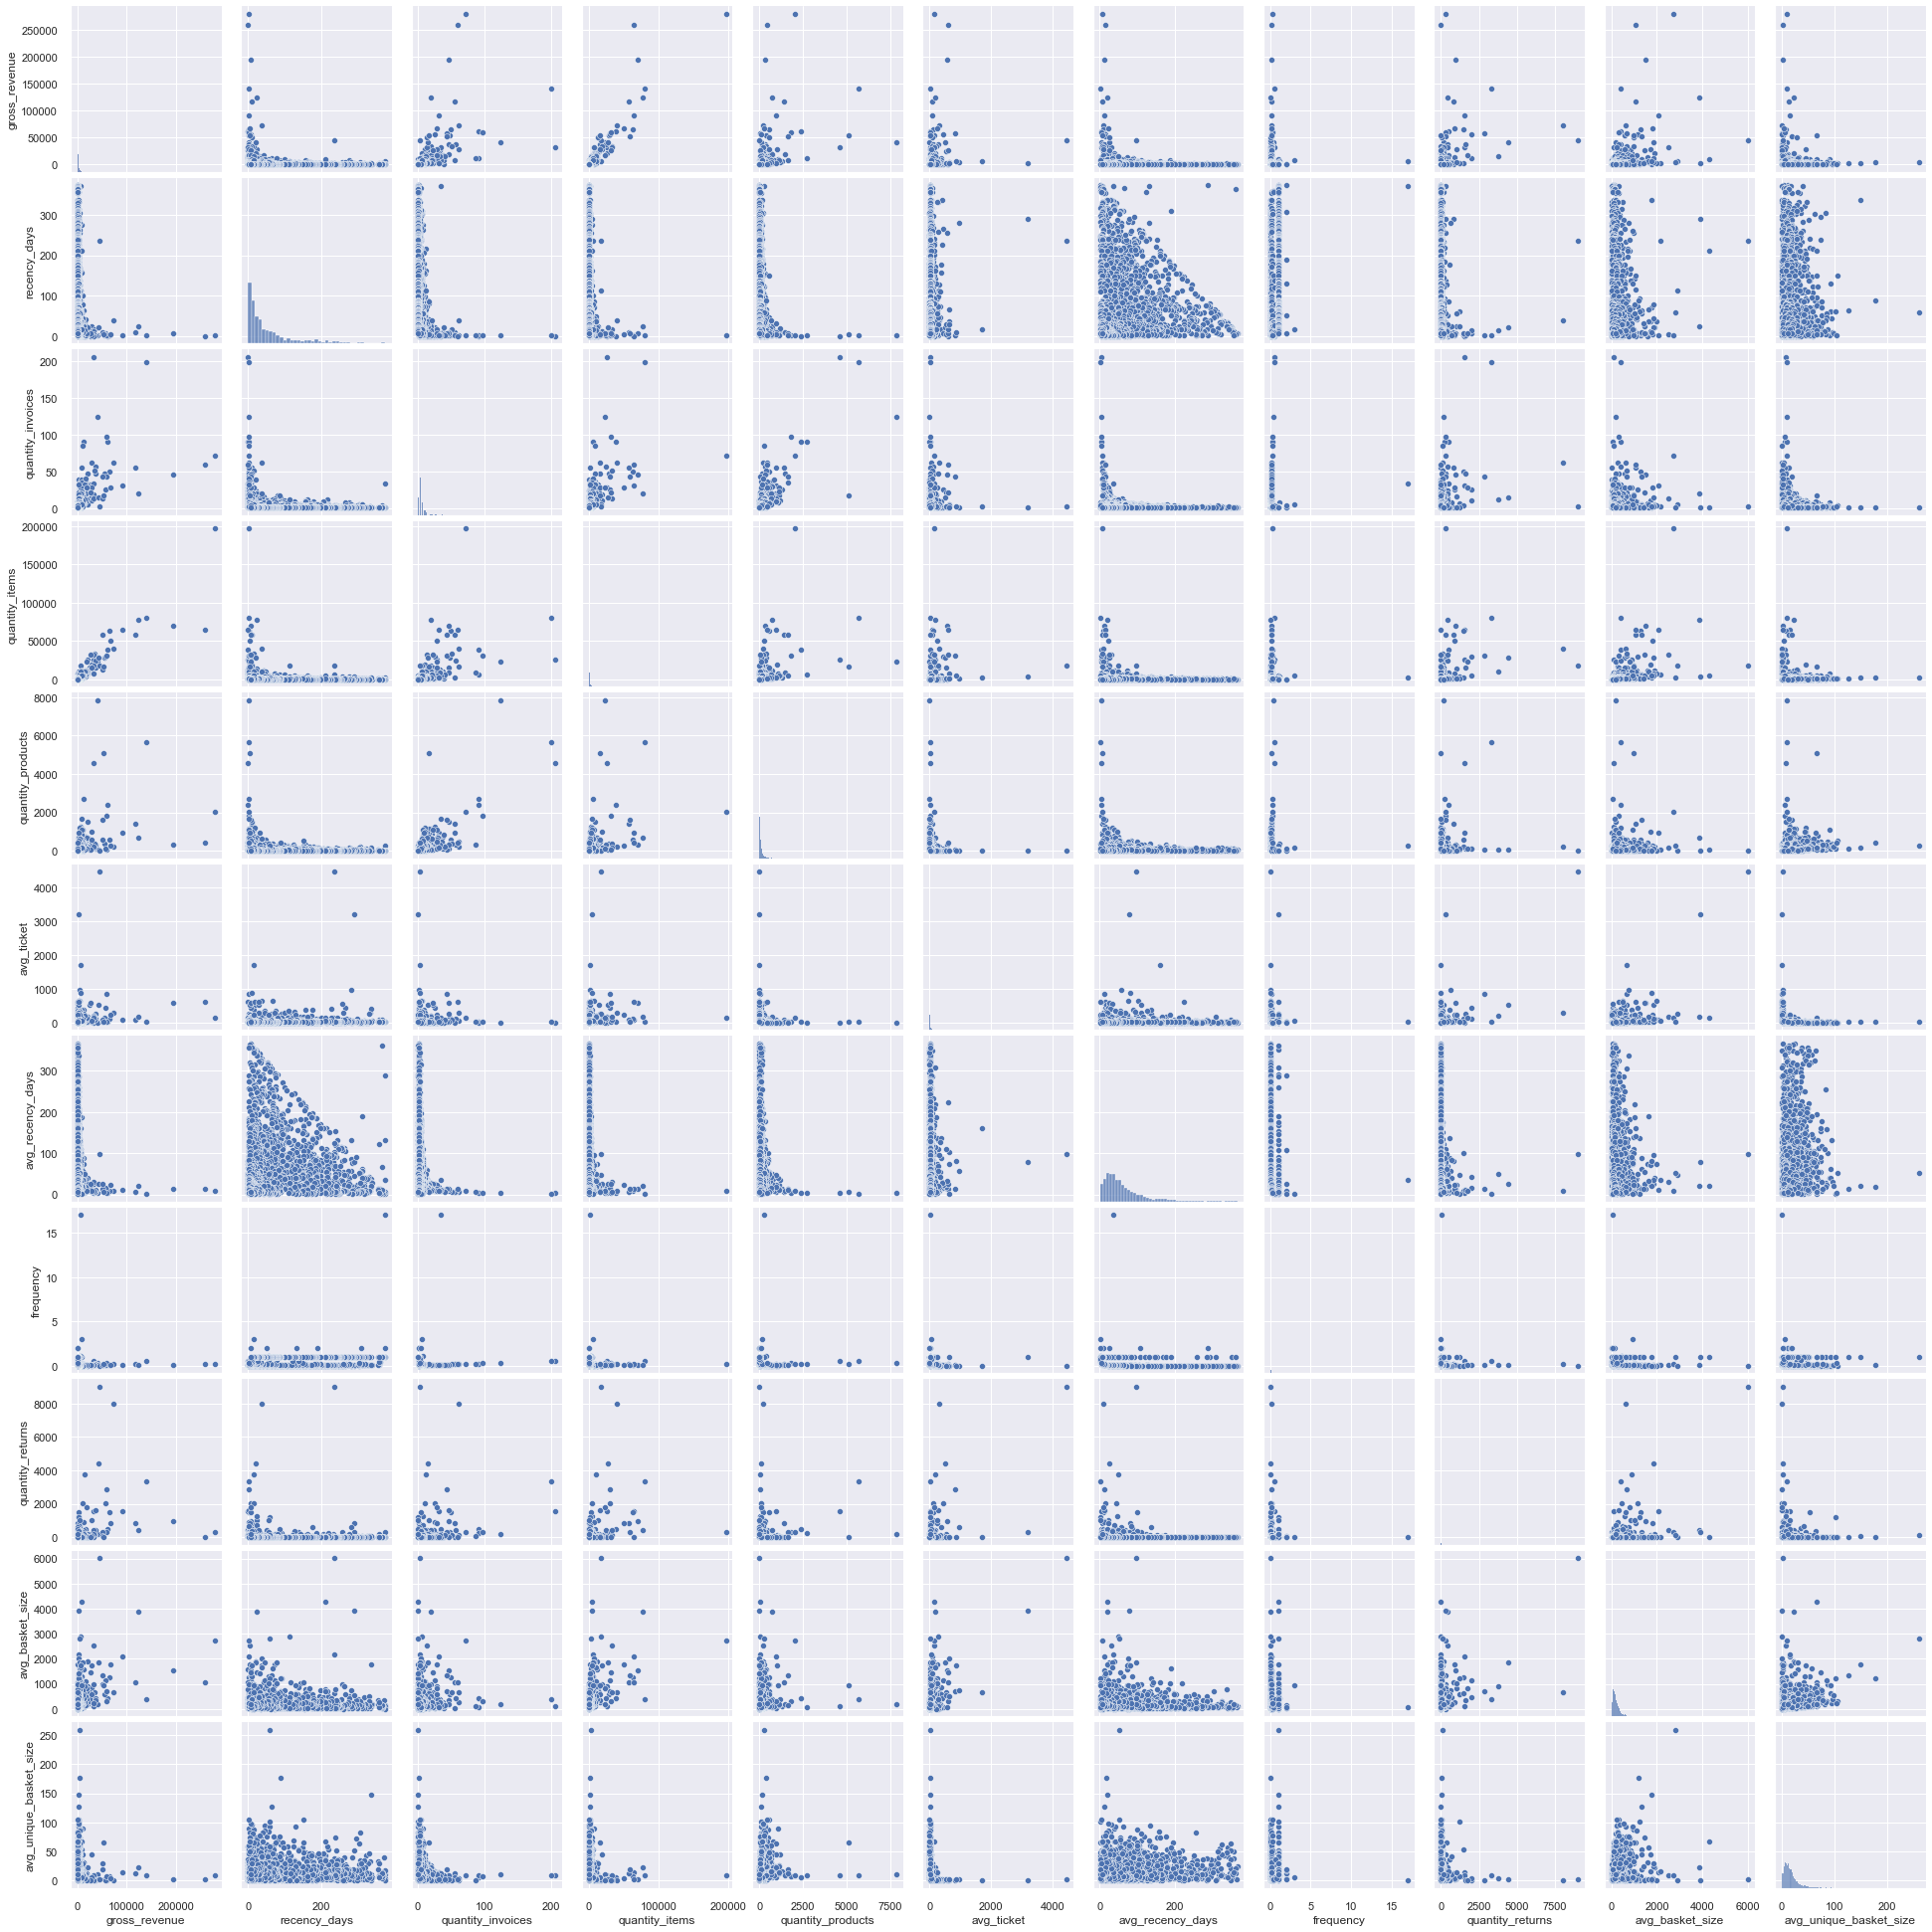

In [54]:
plt.figure(figsize=(25,12))
sns.pairplot(df42)

**Notes**

**1.** Frequency has low variance

**2.** Avg Ticket has low variance

## 4.3 Space

In [55]:
df43 = df4.drop(columns = ['customer_id'], axis=1).copy()

In [56]:
# MinMax Scaler
# from sklearn import prepocessing as pp
mm = pp.MinMaxScaler()

df43['gross_revenue']          = mm.fit_transform(df43[['gross_revenue']])
df43['recency_days']           = mm.fit_transform(df43[['recency_days']])
df43['quantity_invoices']      = mm.fit_transform(df43[['quantity_invoices']])
df43['quantity_items']         = mm.fit_transform(df43[['quantity_items']])
df43['quantity_products']      = mm.fit_transform(df43[['quantity_products']])
df43['avg_ticket']             = mm.fit_transform(df43[['avg_ticket']])
df43['avg_recency_days']       = mm.fit_transform(df43[['avg_recency_days']])
df43['frequency']              = mm.fit_transform(df43[['frequency']])
df43['quantity_returns']       = mm.fit_transform(df43[['quantity_returns']])
df43['avg_basket_size']        = mm.fit_transform(df43[['avg_basket_size']])
df43['avg_unique_basket_size'] = mm.fit_transform(df43[['avg_unique_basket_size']])

X = df43.copy()

### 4.3.1 PCA

In [57]:
#from sklearn import decomposition as dd

In [58]:
X.shape[1]

11

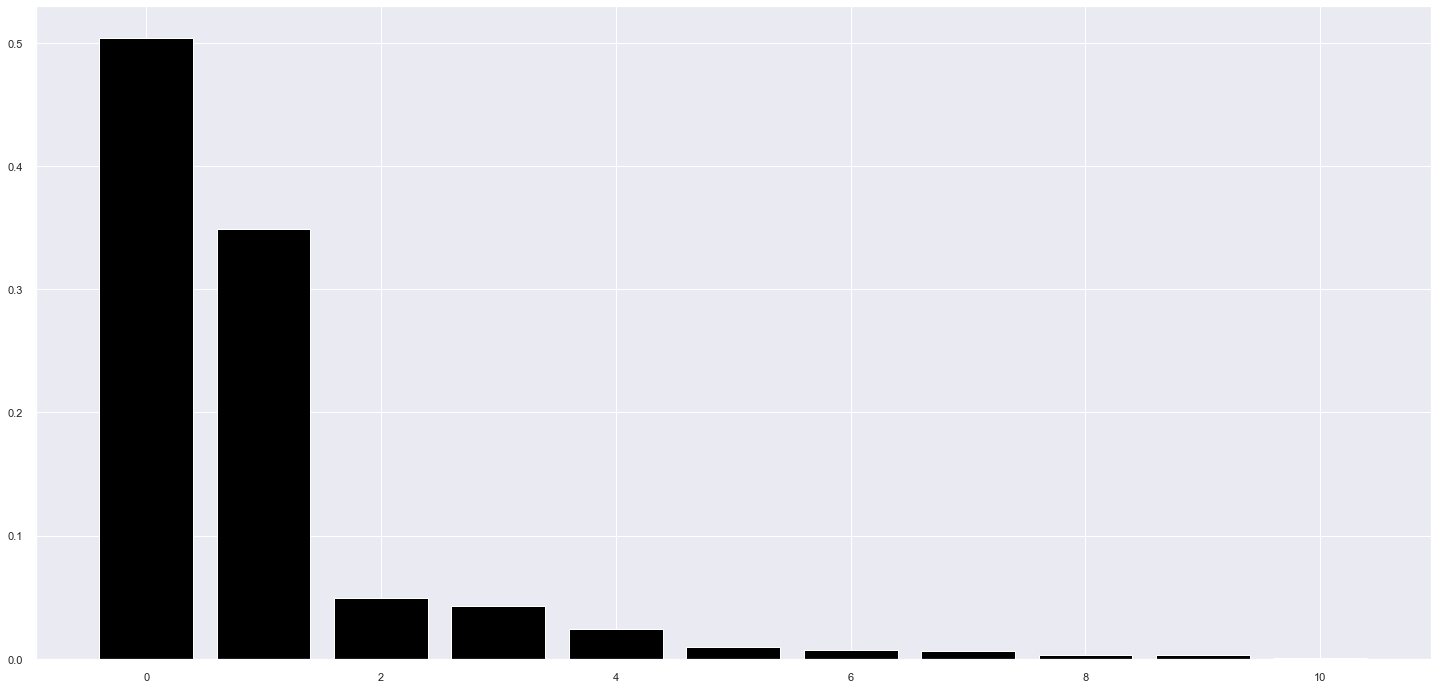

In [59]:
pca = dd.PCA(n_components = X.shape[1])

principal_components = pca.fit_transform(X)

# plot explained variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

# pca component
df_pca = pd.DataFrame(principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

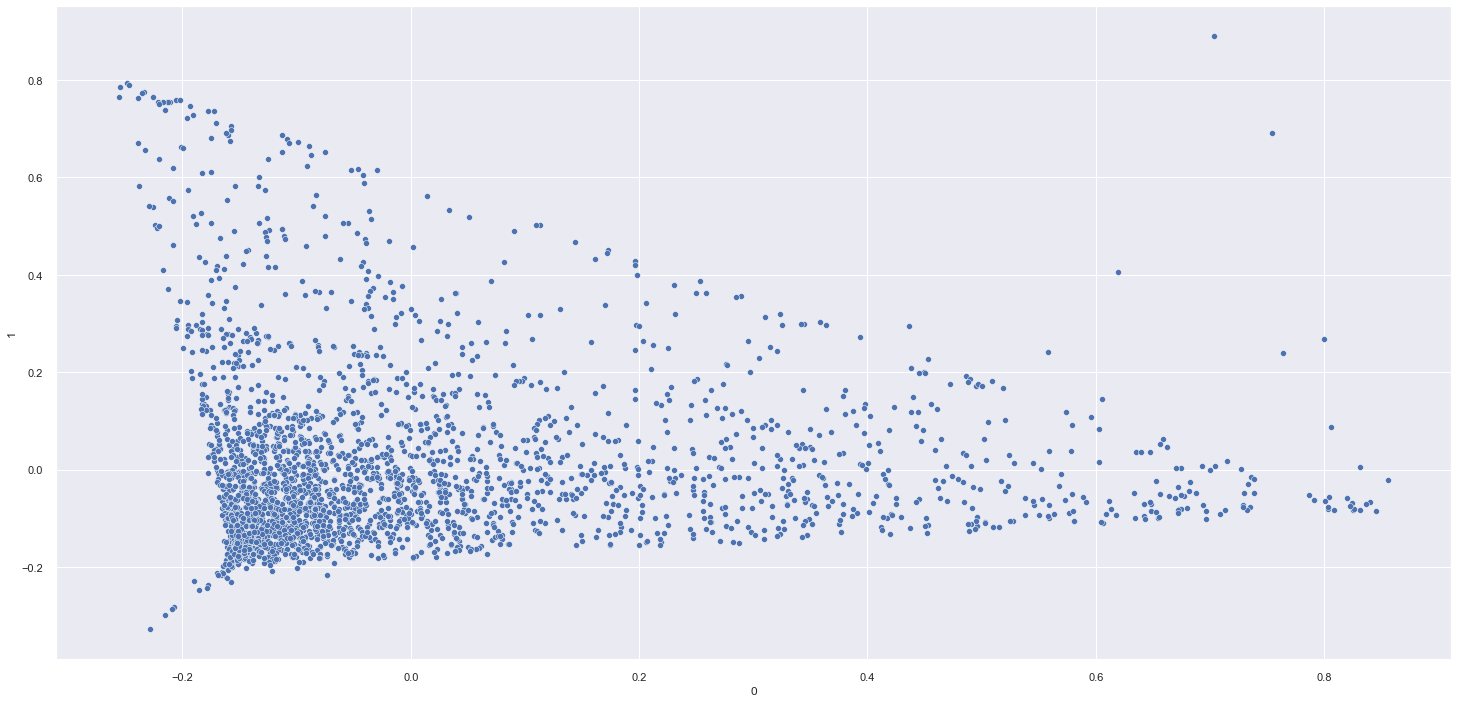

In [60]:
sns.scatterplot(x= 0, y=1, data=df_pca)

### 4.3.2. UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

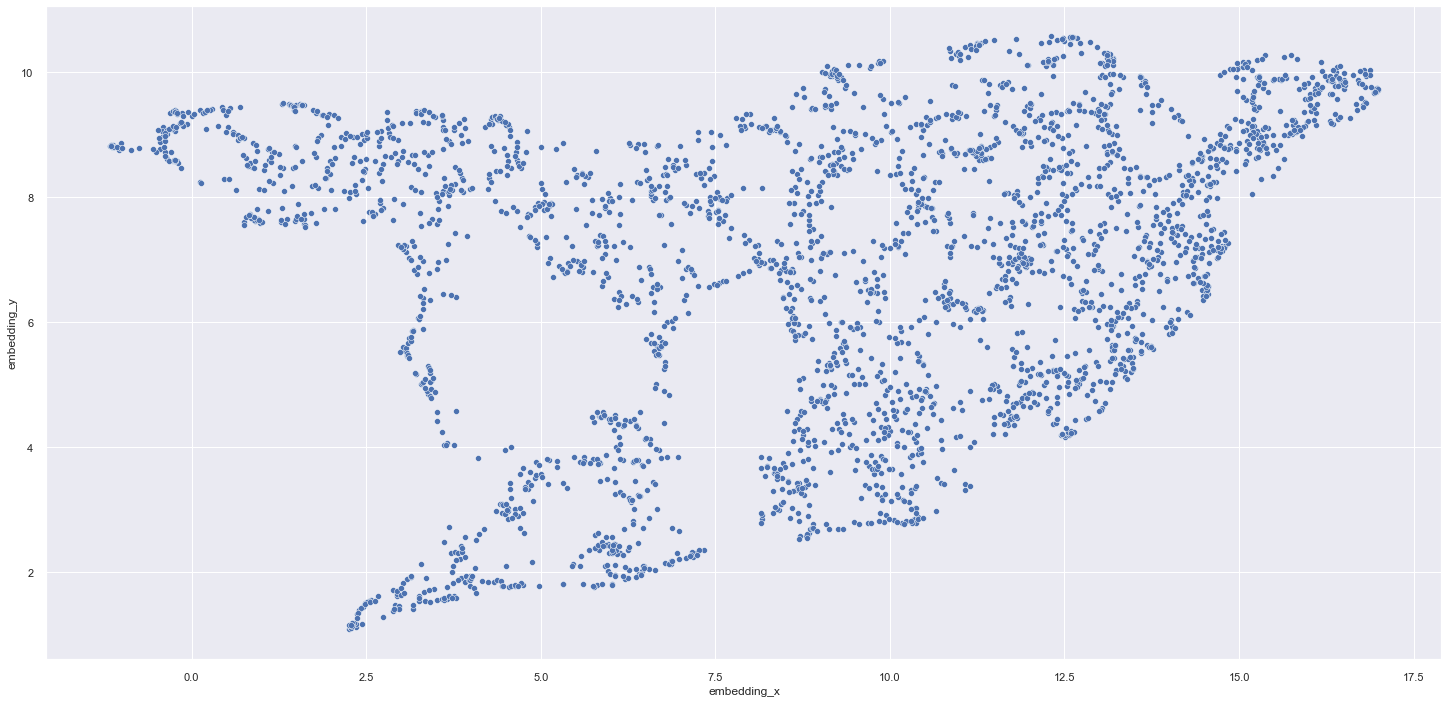

In [61]:
#!pip install llvmlite==0.37.0rc2 --ignore-installed
#!pip install umap-learn
#import umap.umap_ as umap

# UMAP: cluster designed with high dimensionality

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data= df_pca)

### 4.3.2. t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

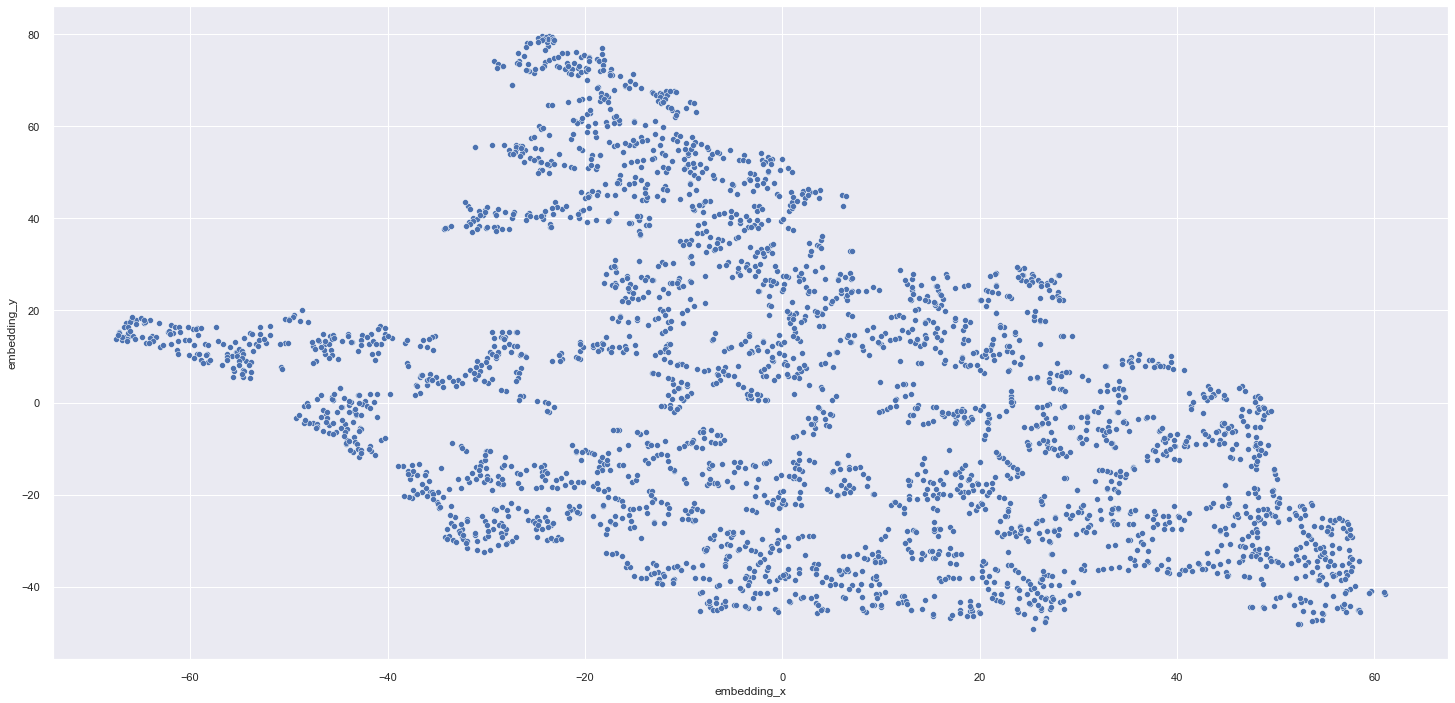

In [62]:
#from sklearn.manifold import TSNE
reducer = TSNE(n_components=2,n_jobs=-1,random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                data= df_pca)

### 4.3.3. Tree-Based Embedding

In [68]:
df4.head()
X = df4.drop(columns =['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue'] # --> “target variable” 

# model definition
# from sklearn import ensemble as en
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# model training
rf_model.fit(X, y)

# Leaf  the result "df_leaf" is a space, but to verify it necessery reduce the dimensionality to 2 dimensions --> Reduzer dimensionality with UMAP.
df_leaf = pd.DataFrame(rf_model.apply(X))

In [69]:
df_leaf.shape

(2968, 100)

In [70]:
# The result "df_leaf" is a space, but to verify it necessery reduce the dimensionality to 2 dimensions --> Reduzer dimensionality with UMAP.
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2991,3176,3326,3338,2284,3138,3252,3133,3166,3364,3154,3290,3146,3188,2800,3205,3017,3175,3124,3268,3069,3081,2906,3299,3351,3323,3269,3015,3090,3041,3311,3388,3367,3340,3143,3248,3409,3123,2961,3028,3278,3248,3221,3134,3178,3106,3287,3337,3348,3139,3109,2921,3139,3392,3378,3216,3172,3414,3221,2976,3422,2885,3335,3255,3015,3042,3306,3327,3131,3305,3344,2993,2702,2966,3115,3160,2965,3105,3217,3049,3250,3241,3050,3073,3284,3152,3351,3203,3133,3272,3181,3174,3190,3028,3045,3114,3185,2817,3357,3326
1,2959,2923,3044,2969,2737,3132,2921,2830,3110,2853,3101,2565,2547,3115,2748,3125,2979,3047,3061,2755,2954,3019,2734,2834,3017,2918,2841,2781,3084,3031,2867,3018,2969,2746,2921,2970,2854,2665,3054,3022,2973,2786,3194,3109,3112,2760,2913,2933,2980,3111,3177,3005,3057,2950,2979,2958,3127,3017,2859,2963,2993,2859,2897,2875,3000,3039,2977,2902,3042,2915,2957,2964,3145,2930,3045,2786,2899,3071,3161,3024,2920,2893,2983,2582,2907,3087,2940,3155,3093,2852,2515,2888,2881,2987,3144,3014,2911,2798,2965,2826
2,3633,3609,3578,3406,3570,3659,3630,3546,3680,3615,3627,3578,3545,3652,3563,3566,3583,3654,3552,3464,3513,3633,3603,3522,3573,3647,3575,3604,3583,3720,3432,3674,3595,3635,3574,3614,3547,3517,3598,3484,3653,3403,3633,3509,3535,3602,3426,3649,3630,3553,3632,3504,3567,3606,3683,3630,3610,3645,3560,3572,3614,3587,3583,3689,3453,3622,3652,3493,3552,3625,3583,3426,3572,3605,3545,3559,3597,3567,3540,3494,3436,3449,3566,3428,3531,3597,3581,3696,3596,3562,3601,3448,3560,3482,3598,3461,3528,3620,3568,3654
3,1278,1411,1758,1489,2018,1461,2104,1458,1654,1718,2044,2298,1344,1603,1521,2005,1921,1601,1932,1413,1834,1444,1464,1495,1154,1476,1509,1528,1987,1313,1947,1533,1505,1450,1540,1537,2163,2204,1660,1480,1495,1482,1461,1809,1526,1498,1469,1434,1389,1665,1799,1494,1349,2227,2107,1492,1556,1737,1298,2126,1483,1903,1886,1773,1480,1488,1391,1759,1065,1361,2301,1585,2181,2171,1274,2044,2044,1499,1914,1467,1910,1419,1520,1637,1481,1492,2056,1342,1661,1541,1872,1719,2027,1886,1936,2265,1470,1196,1986,2107
4,355,717,580,692,146,711,734,689,191,197,580,722,667,195,566,608,575,418,550,413,576,709,416,200,630,210,441,205,147,728,703,201,211,202,233,718,594,202,702,973,515,869,217,591,893,675,285,602,691,606,588,184,757,398,80,549,699,664,719,604,231,731,188,206,662,457,473,590,456,202,713,230,550,620,717,199,718,181,108,226,209,697,757,217,681,163,305,725,687,808,331,193,585,544,195,156,188,704,706,175


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

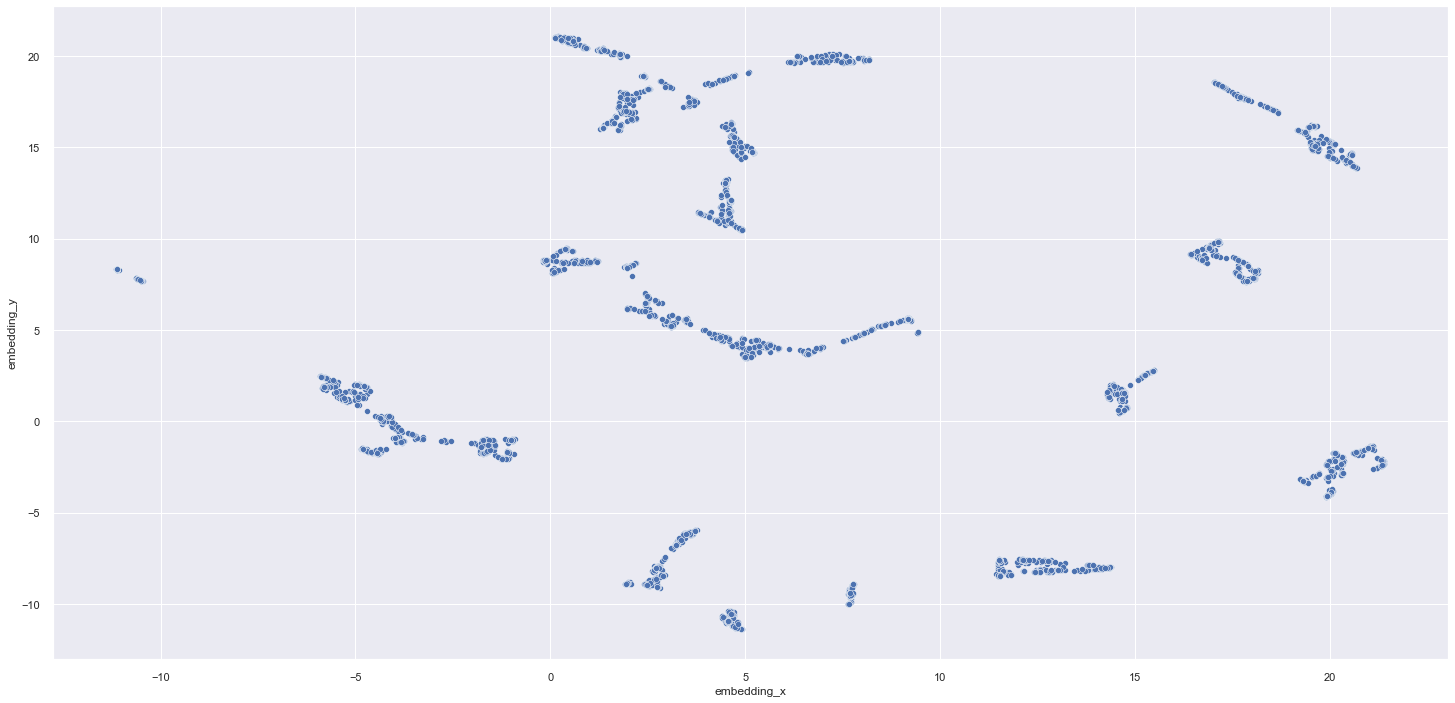

In [74]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_pca )

# 5.0. Data Preparation

In [75]:
df5 = df4.copy()

In [76]:
# Standard Scaler
# from sklearn import preprocessing as pp
ss = pp.MinMaxScaler()

df5['gross_revenue']          = ss.fit_transform(df5[['gross_revenue']])
df5['recency_days']           = ss.fit_transform(df5[['recency_days']])
df5['quantity_invoices']      = ss.fit_transform(df5[['quantity_invoices']])
df5['quantity_items']         = ss.fit_transform(df5[['quantity_items']])
df5['quantity_products']      = ss.fit_transform(df5[['quantity_products']])
df5['avg_ticket']             = ss.fit_transform(df5[['avg_ticket']])
df5['avg_recency_days']       = ss.fit_transform(df5[['avg_recency_days']])
df5['frequency']              = ss.fit_transform(df5[['frequency']])
df5['quantity_returns']       = ss.fit_transform(df5[['quantity_returns']])
df5['avg_basket_size']        = ss.fit_transform(df5[['avg_basket_size']])
df5['avg_unique_basket_size'] = ss.fit_transform(df5[['avg_unique_basket_size']])

# 6.0. Feature Selection

In [77]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine Tunning

In [135]:
X = df6.drop(columns = ['customer_id'])

In [136]:
X.head()

,gross_revenue,recency_days,quantity_invoices,quantity_items,quantity_products,avg_ticket,avg_recency_days,frequency,quantity_returns,avg_basket_size,avg_unique_basket_size
0,0.019292,0.997319,0.160976,0.008799,0.037770,0.003595,0.094521,1.000000,0.004438,0.008317,0.001614
1,0.011559,0.150134,0.039024,0.007056,0.021692,0.003764,0.071918,0.001345,0.003883,0.025539,0.044307
2,0.024000,0.005362,0.068293,0.025538,0.029476,0.006010,0.060788,0.002052,0.005547,0.055623,0.028594
3,0.003375,0.254692,0.019512,0.002225,0.003445,0.007125,0.251142,0.000734,0.000000,0.014447,0.017774
4,0.003116,0.892761,0.009756,0.000401,0.000255,0.065116,0.020822,0.003985,0.002441,0.004272,0.000515


In [137]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1. K-Means

In [138]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k)

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)


Text(0.5, 1.0, 'Silhouette Score x K')

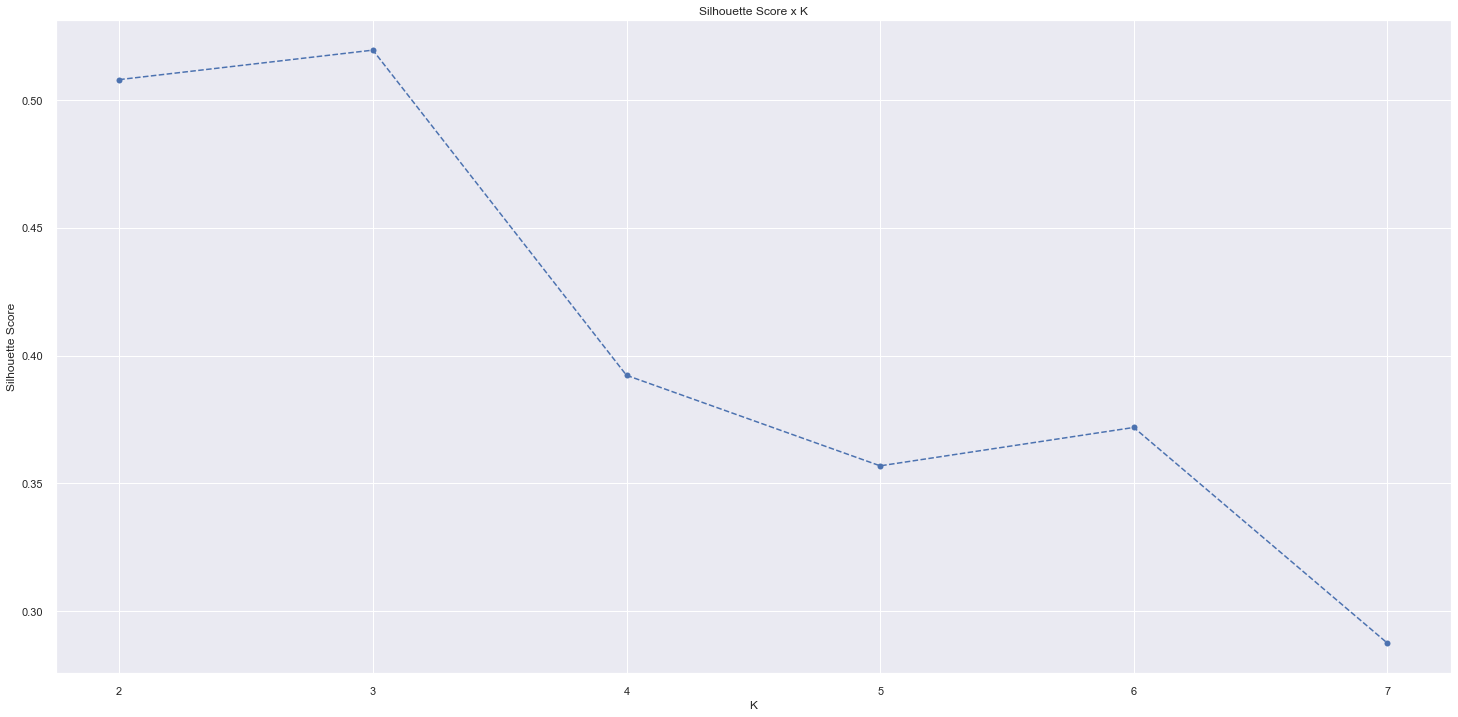

In [139]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.2. GMM

In [154]:
# from sklearn import mixture as mx

gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components=k)

    # model training
    gmm_model.fit(X)

    # model predict
    labels = gmm_model.predict(X)

    # model performance
    sil = m.silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)

In [155]:
gmm_list

[-0.004519169846328272,
 0.012877064893908937,
 -0.03728381010013654,
 -0.04813058161166725,
 -0.032090245164608955,
 -0.09596520848064725]

Text(0.5, 1.0, 'Silhouette Score x K')

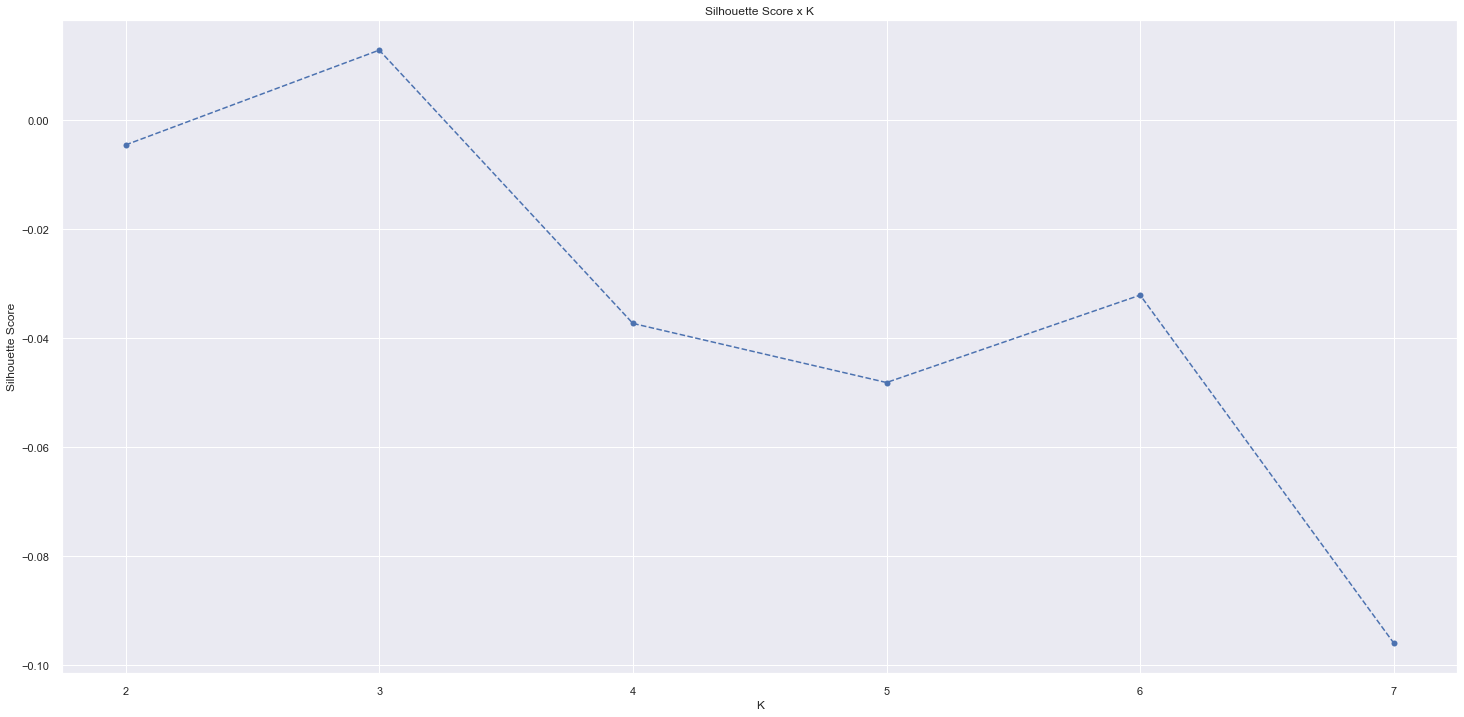

In [156]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K')

## 7.3. Hierarchical Clustering

In [161]:
# from scipy.cluster import hierarchy as hc

# model definition and training
hc_model = hc.linkage(X, 'ward')

[]

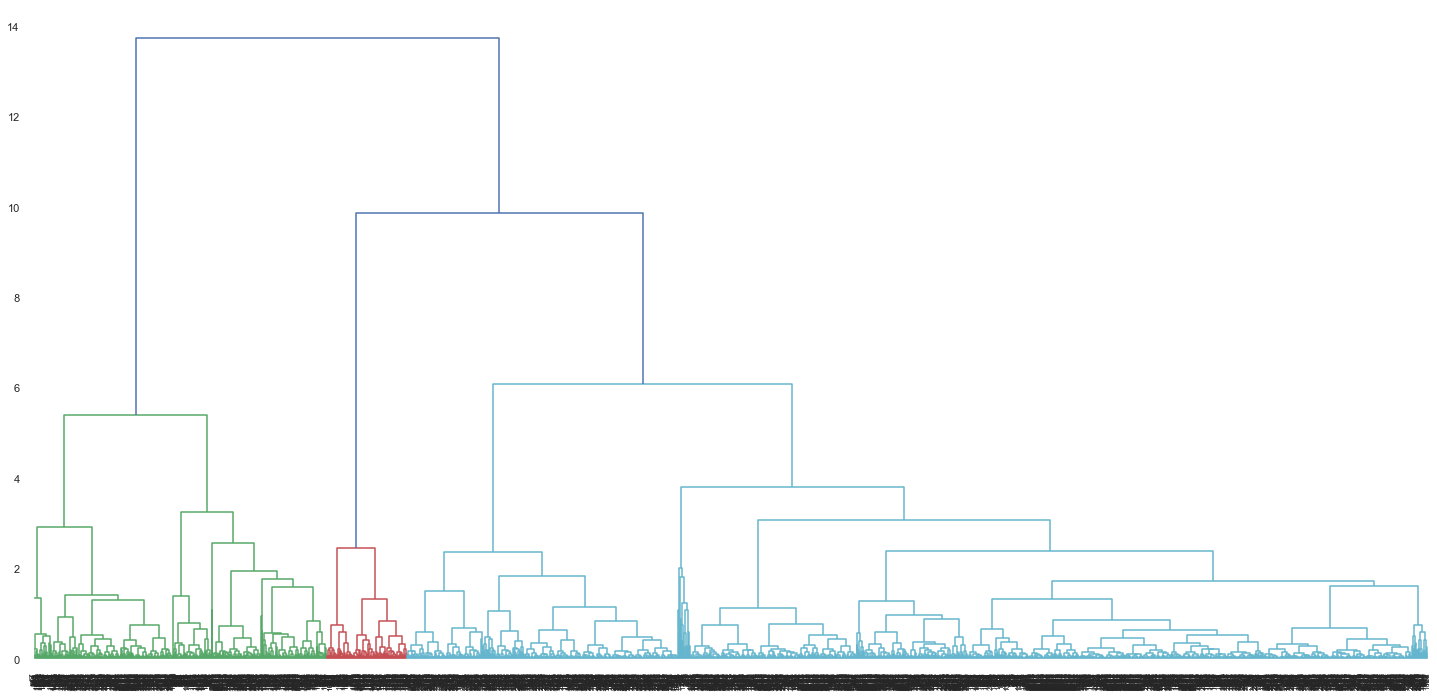

In [162]:
hc.dendrogram(
    hc_model,
    leaf_rotation = 90,
    leaf_font_size=8
)

plt.plot()

[]

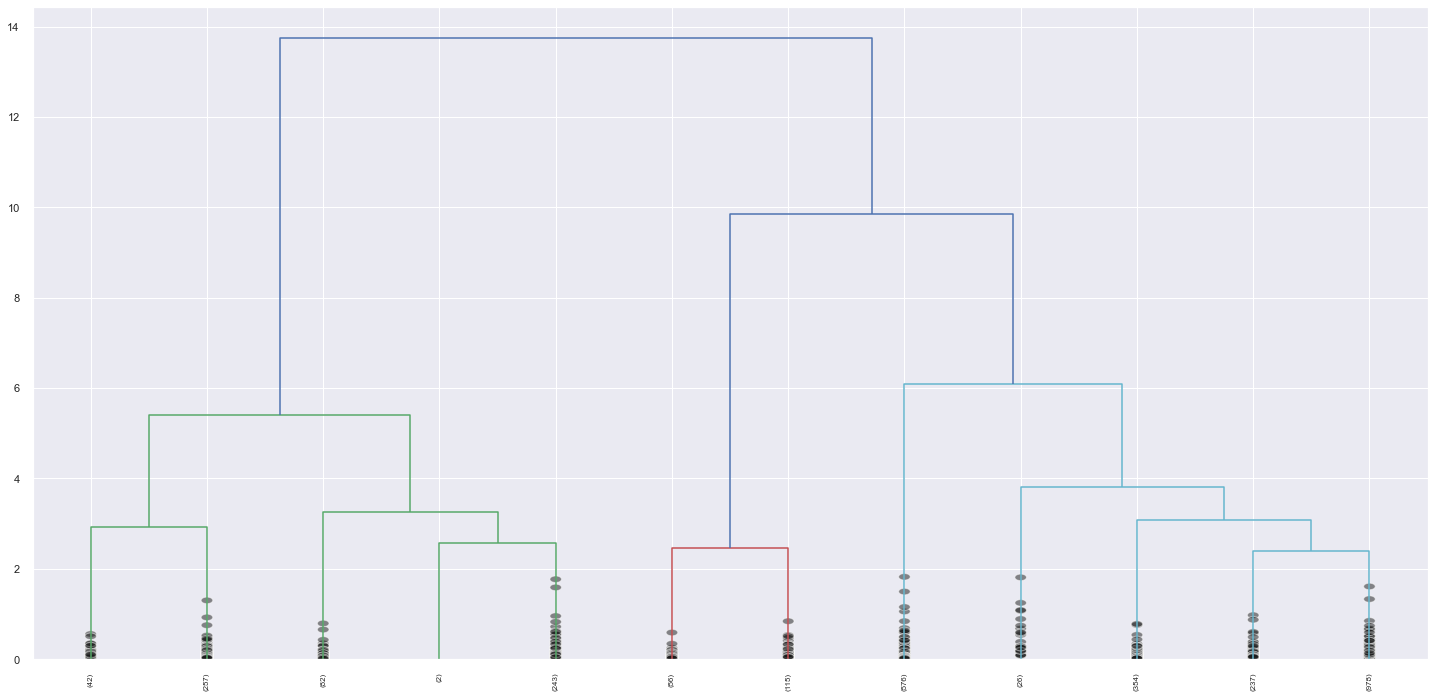

In [163]:
hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation = 90,
    leaf_font_size=8,
    show_contracted=True
)

plt.plot()

### 7.3.1. HClustering Silhouette Score

In [170]:
hc_list = []
for k in clusters:
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    # metrics
    sil = m.silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)

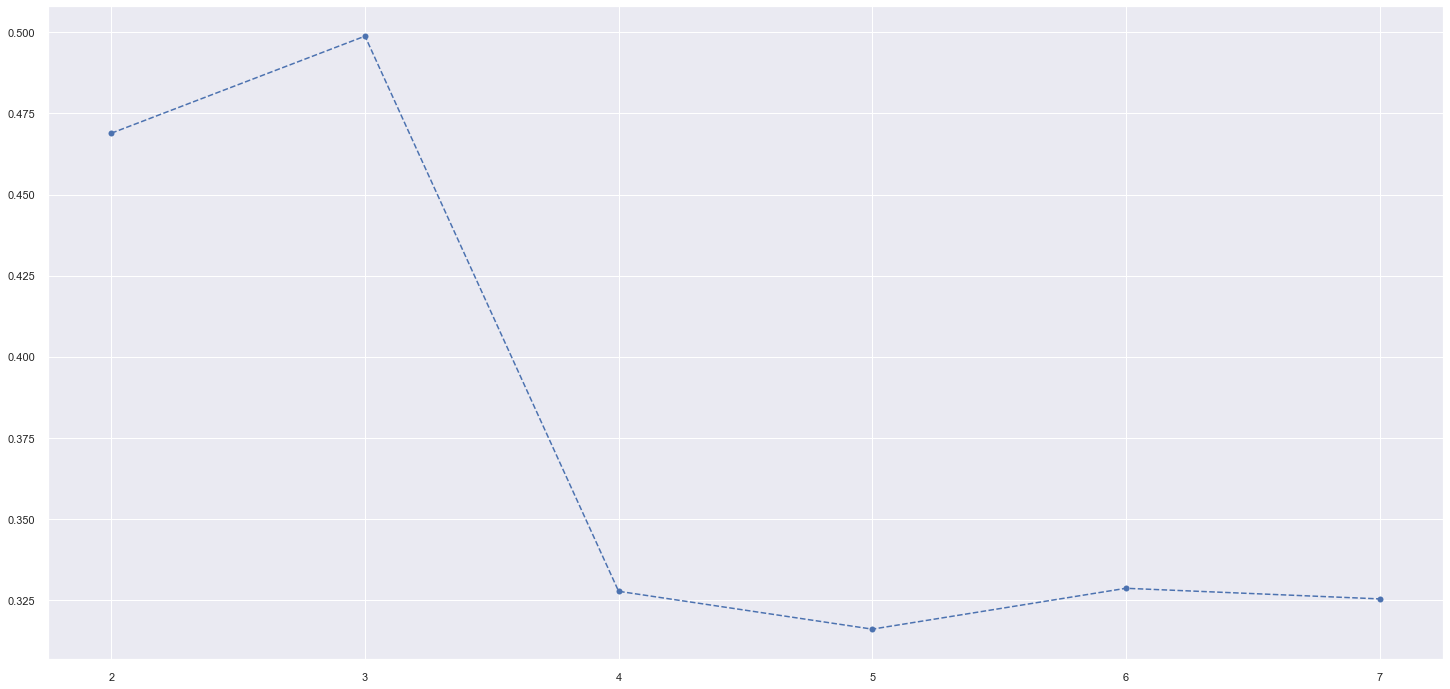

In [173]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')

## 7.4. DBSCAN

In [216]:
eps=0.2
min_samples=20

# model definition
dbscan_model = c.DBSCAN(eps=eps, min_samples=min_samples)

# model training & predict
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric='euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(len(unique(labels))))
print(unique(labels))

Silhouette Score: 0.622034827461325
Number of Clusters: 2
[-1  0]


In [217]:
#import sklearn
#sklearn.__version__
#'0.16.1'
#from sklearn.neighbors import NearestNeighbors

In [218]:
neighbors = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = neighbors.kneighbors(X)

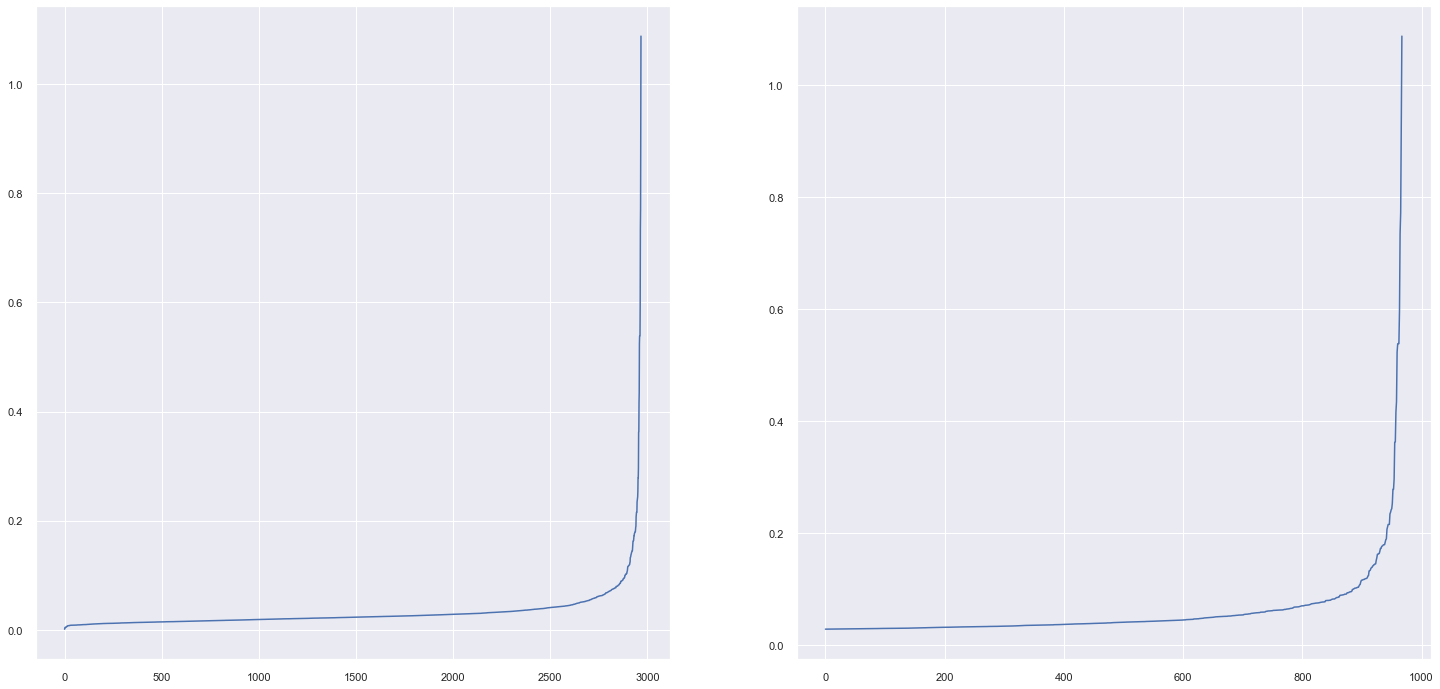

In [219]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.subplot(1, 2, 1 )
plt.plot(distances)

plt.subplot(1, 2, 2 )
plt.plot(distances[2000:])

In [226]:
dbscan_list = [0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 7.5. Results

In [227]:
df_results = pd.DataFrame(
    {'KMeans': kmeans_list,
     'GMM': gmm_list,
     'HC': hc_list, 
     'DBSCAN': dbscan_list}
).T

df_results.columns = clusters
df_results.style.highlight_max(color='yellow', axis=1)

,2,3,4,5,6,7
KMeans,0.507904,0.519431,0.392281,0.356885,0.371892,0.287552
GMM,-0.004519,0.012877,-0.037284,-0.048131,-0.032090,-0.095965
HC,0.468911,0.498824,0.327713,0.316046,0.328641,0.325372
DBSCAN,0.622034,0.000000,0.000000,0.000000,0.000000,0.000000


## 7.6. Silhouette Analysis

 For K = 2. Silhouette Score: 0.4689113070295039
 For K = 3. Silhouette Score: 0.49882430497442565
 For K = 4. Silhouette Score: 0.32771315437908355
 For K = 5. Silhouette Score: 0.3160463752933211
 For K = 6. Silhouette Score: 0.3286405694813848
 For K = 7. Silhouette Score: 0.3253720291762707


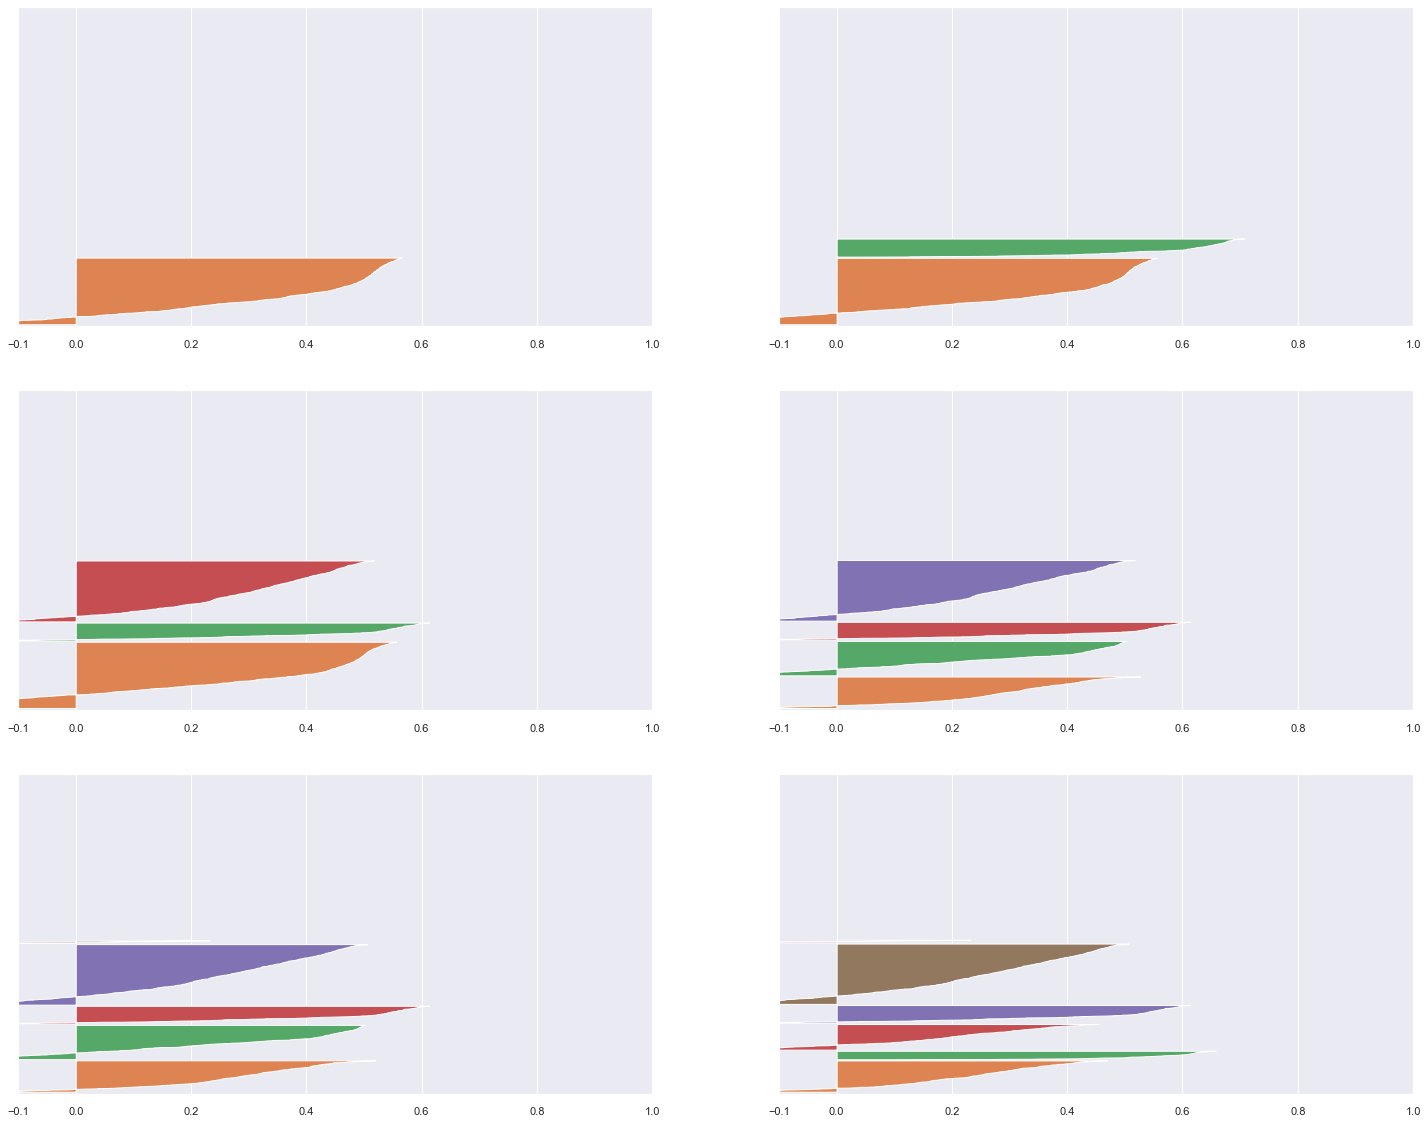

In [231]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## 7.1. Within-Cluster Sum os Square (WSS)

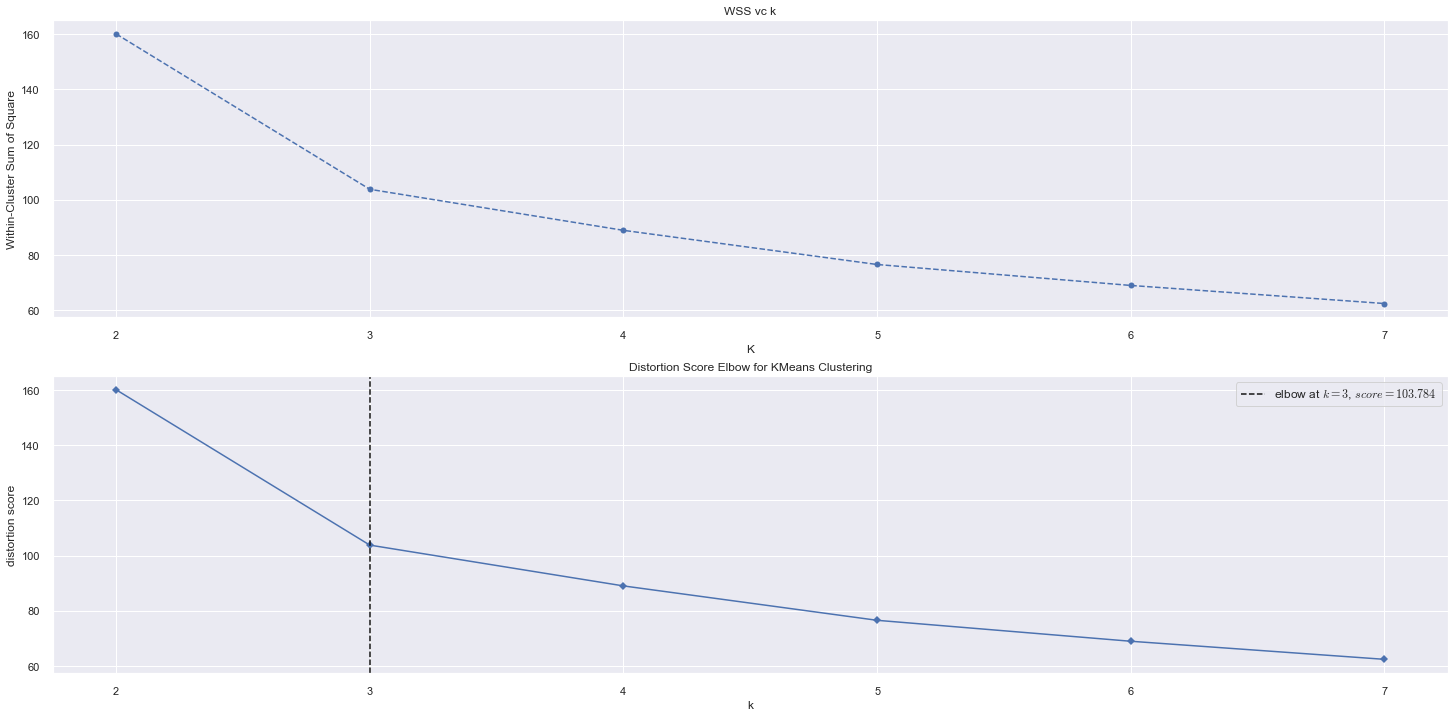

In [243]:
# WSS: Within- CLuster Sum of Squares -> compactness
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    

plt.subplot(2, 1, 1 )
# Plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker = 'o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vc k')

plt.subplot(2, 1, 2 )
#from yellowbrick.cluster import KElbowVisualizer
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False)
kmeans.fit( X)
kmeans.show()

plt.show()

## 7.2. Silhouette Score

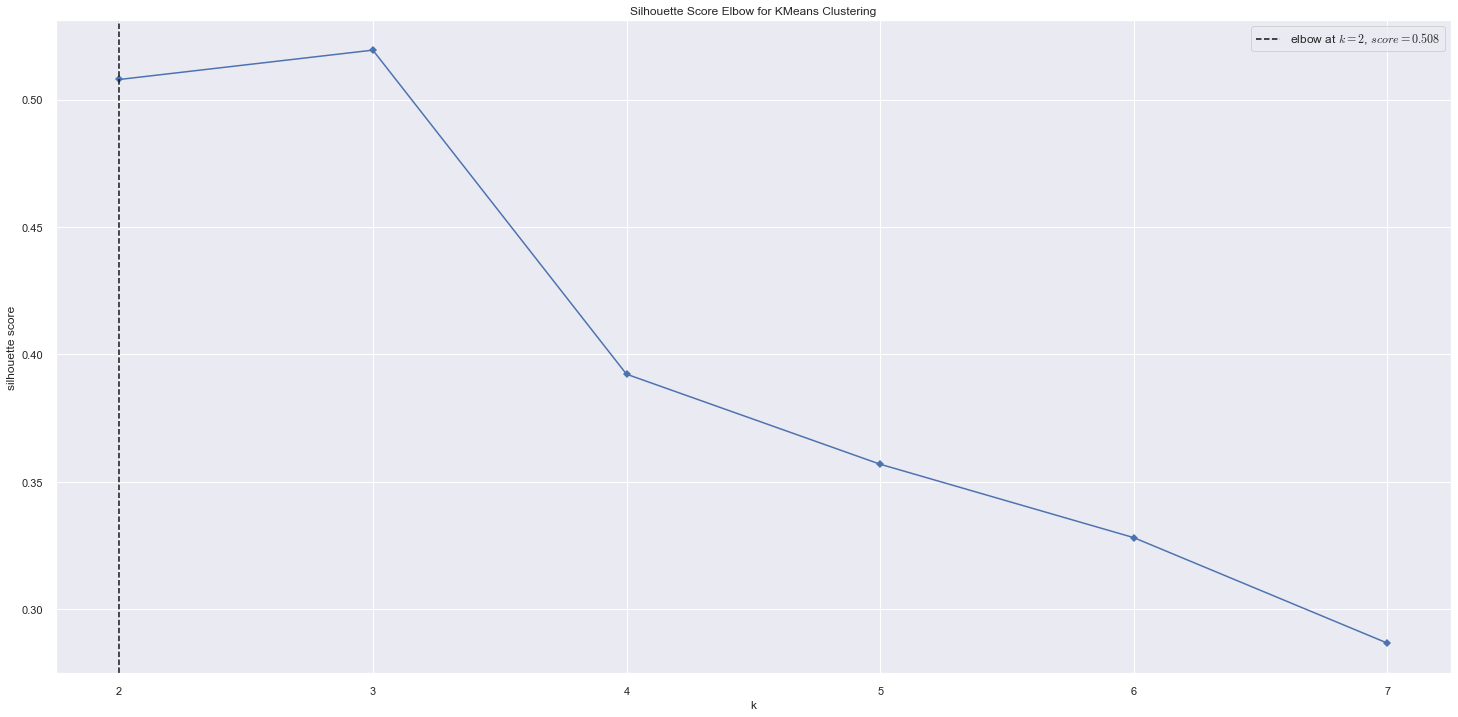

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [244]:
# Silhoutte Score: is calculated using the mean intra-cluster distance ( a ) and the mean nearest-cluster distance ( b ) for each sample
# Is about separation
# Silhouette is better than Wss because takes into consideration the nearest-cluster distance.

kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit( X)
kmeans.show()


## 7.1. Silhouette Analysis

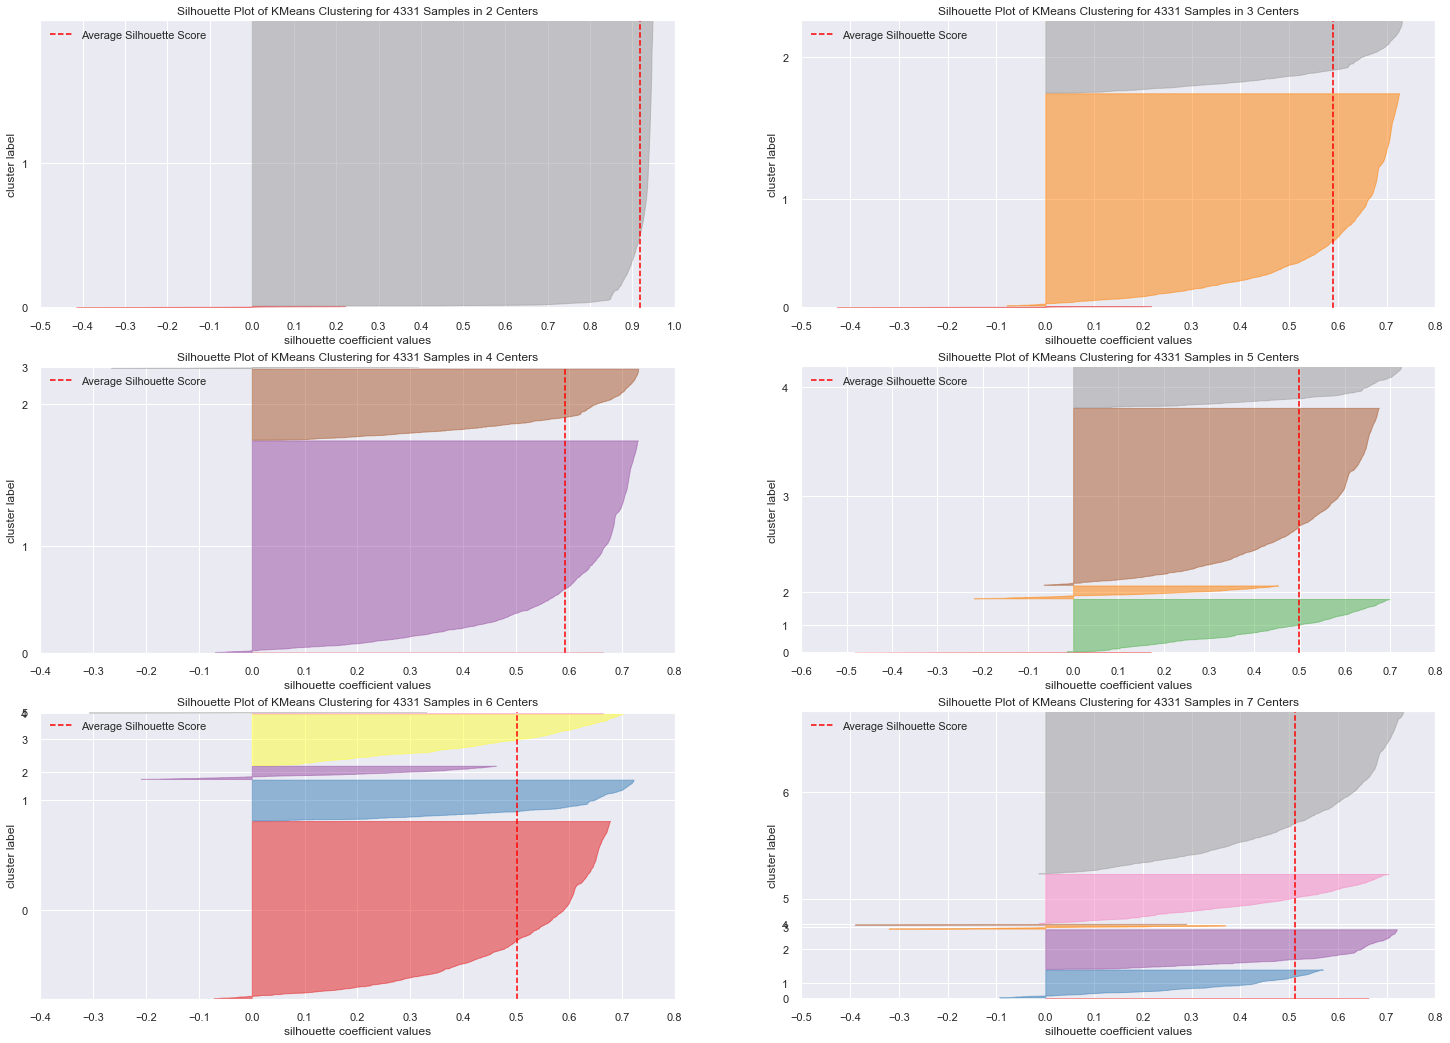

In [204]:
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
k=3
fig, ax = plt.subplots(3,2, figsize=(25,18))
for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, colosr='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# 8.0. Model Training

## 8.1. K-Means

In [205]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [206]:
# WSS (Within- cluster sum of square)
print('WSS value: {}'.format( kmeans.inertia_))

from sklearn import metrics as m
# SS (Silhouette Score)
print('SS value: {}'.format (m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 9306.48353575122
SS value: 0.583140863579508


# 9.0. Cluster Analysis

In [207]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,0.370775,2.798137,3.858949,-0.033857,2
1,13047,0.131350,-0.609622,0.743157,-0.033401,0
2,12583,0.580906,-0.899432,1.392280,-0.026143,0
3,13748,-0.123151,0.029957,0.094034,-0.023154,0
4,15100,-0.131183,2.408394,-0.165616,0.152610,2


## 9.1. Visualization Inspection

NameError: name 'viausalizer' is not defined

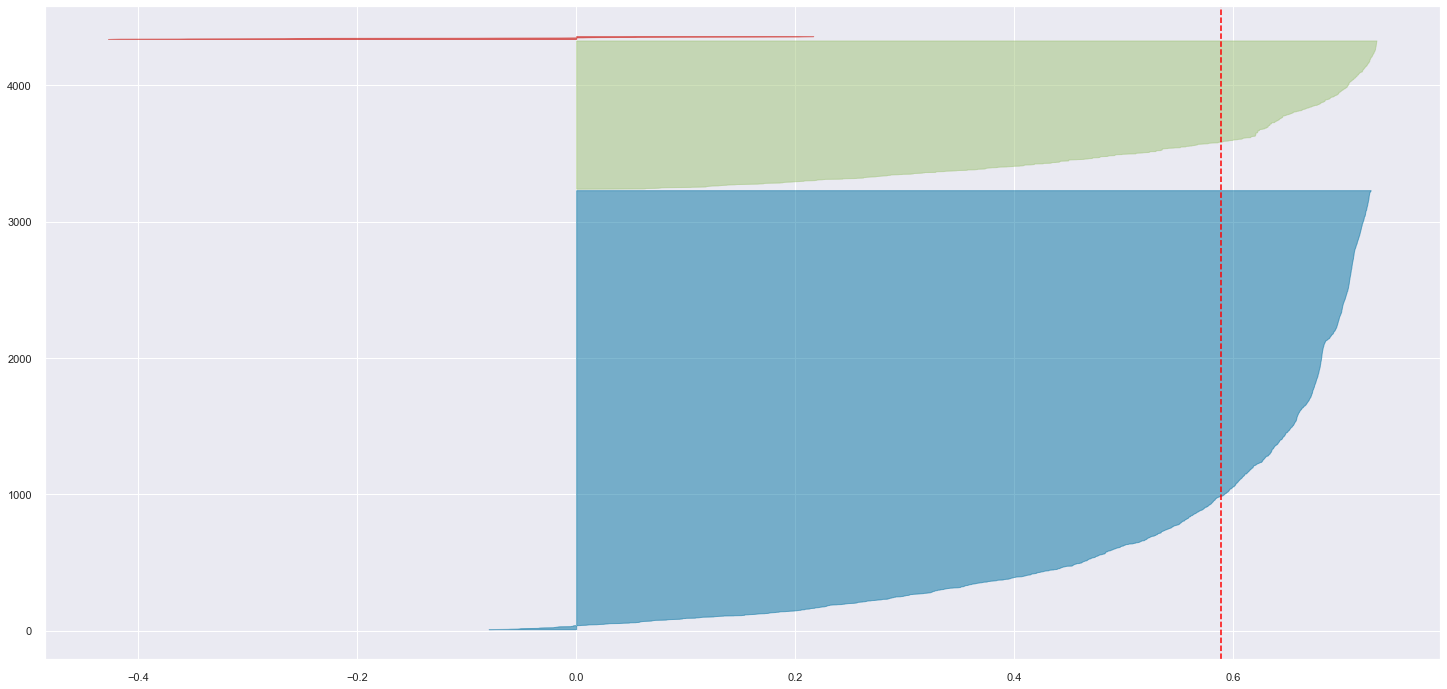

In [176]:
#from plotly import express as px
#fig = px.scatter_3d(df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
viausalizer.finalize()

## 9.2. 2d plot

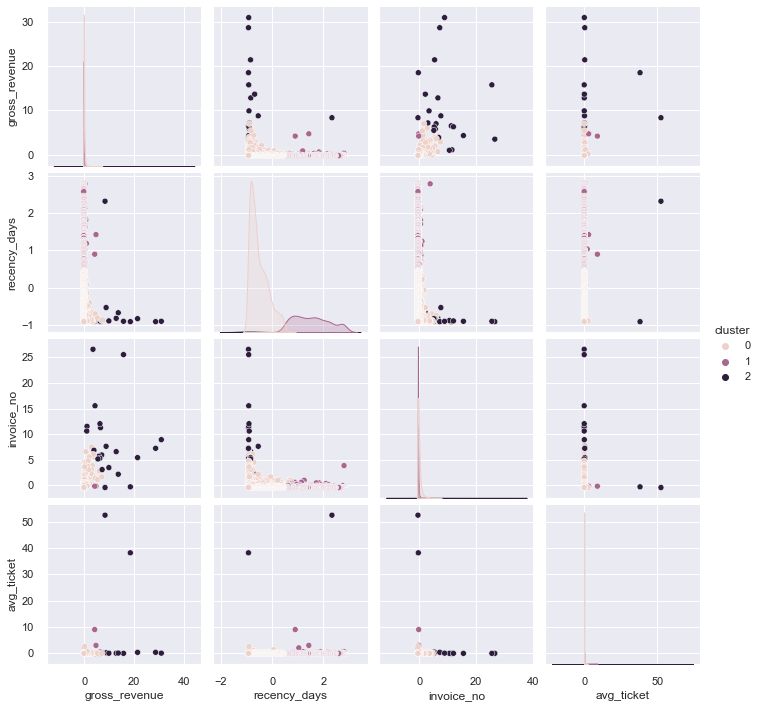

In [177]:
df_viz = df9.drop( columns = 'customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## 9.4. UMAP -t-SNE


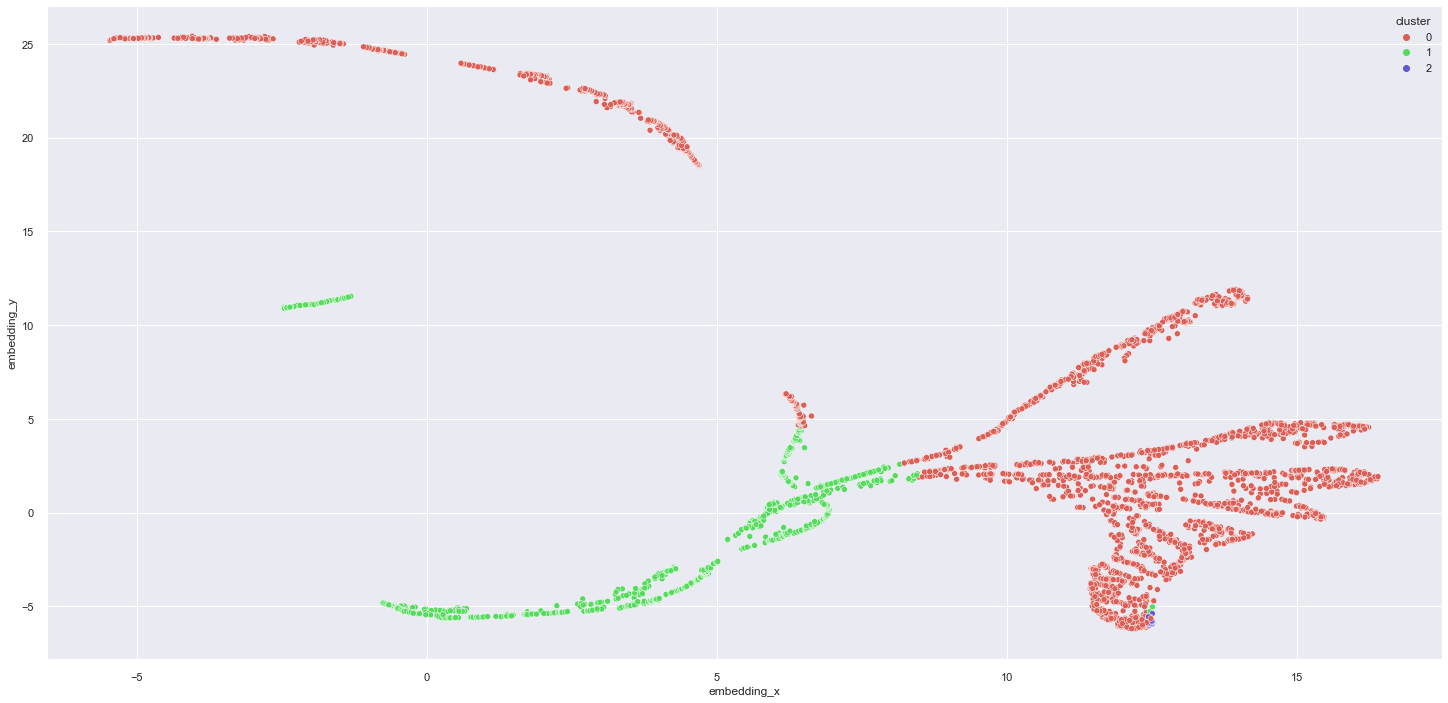

In [178]:
#!pip install llvmlite==0.37.0rc2 --ignore-installed
#!pip install umap-learn
#import umap.umap_ as umap

# UMAP: cluster designed with high dimensionality

reducer = umap.UMAP(n_neighbors=90, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot(x='embedding_x',
                y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls',
                                          n_colors=len(
                                              df_viz['cluster'].unique())),
                data=df_viz)

## 9.2. Profil de grappe

In [208]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how = 'inner', on ='cluster')

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how = 'inner', on ='cluster')

# Avg invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how = 'inner', on ='cluster')

# Avg ticket
df_avg_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how = 'inner', on ='cluster')

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,3227,74.509351,-0.002545,-0.515841,0.077257,-0.024764
1,1,14,0.323251,13.529129,-0.626040,9.404318,6.541111
2,2,1090,25.167398,-0.166235,1.535215,-0.349514,-0.010700


**Cluster 1: Insider Candidate**
- Number of customers: 6 (0,14% of customers)
- Average Recency: 7 days
- Average Purchase: 89 
- Avarage Revenue: $ 182.182,00 dollars
- Avarage Ticket: $ 253,62

**Cluster 0:**
- Number of customers: 28 (0,64% of customers)
- Average Recency: 6 days
- Average Purchase: 57 
- Avarage Revenue: $ 42.614,38 dollars  
- Avarage Ticket: $ 162,86

    
**Cluster 3:**
- Number of customers: 269 (6,15% of customers)
- Average Recency: 20 days
- Average Purchase: 19 
- Avarage Revenue: $ 944, 95 dollars
- Avarage Ticket: $ 62,47


**Cluster 2:**
- Number of customers: 4069 (93,06% of customers)
- Average Recency: 92 days
- Average Purchase: 4 
- Avarage Revenue: $ 1.372,57 dollars  
- Avarage Ticket: $ 25.36

# 10.0. Deploy to Production